## Explore and Calculate Metrics for fb one

Here we calculate metrics for final post-processed boxes and can look at how those metrics change with other steps in the post processing, if you want to.

In [71]:
# which metric file?
binary_dirs = 'binaries_model6_tfrecordz/'

use_valid = True

# do we want to save our results to .dat files for use in other areas (like tables in latex)
save_dats = True
#any extra tag to anything
adder_dats = ''
# which iou's to save?
ioustar = [0.9] # fig, caption
scorestar = 0.1

adder = ''

pp2 = '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/MetricsResults/binaries_model6_tfrecordz_valid_fbdetect.pickle'

In [72]:
if use_valid: adder = '_valid'

How do we want to quantify how well we are doing?

In [73]:
n_folds_cv = 5 # for calculating the spread in our metrics, we we'll do a CV
scoreminVec = [0.1, 0.5, 0.9] # list of minimum box "scores"
iouminVec = [0.1, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95] # list of IOU cut offs we want to explore

# other classes
other_classes = ['text', 'title', 'list', 'table', 'figure']

In [74]:
import pickle
from sys import path
path.append('../')
import config
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from metric_utils import calc_base_metrics_allboxes_cv, calc_prec_rec_f1_cv, print_metrics_table, \
  get_years_dataframe

In [75]:
# # debugging
# import metric_utils
# reload(metric_utils)
# from metric_utils import calc_base_metrics_allboxes_cv,calc_metrics

In [212]:
# # build up filename
pp = config.metric_results_dir
pp += binary_dirs.split('/')[0]
pp += adder
pp += '.pickle'

with open(pp, 'rb') as ff:
    icombo,imgs_name, truebox, pdfboxes, pdfrawboxes, captionText_figcap,\
                 bbox_figcap_pars,\
                 sboxes_cleaned, slabels_cleaned, sscores_cleaned,\
                 boxes_pdf, labels_pdf, scores_pdf,\
                 boxes_heur, labels_heur, scores_heur,\
                 boxes_heur2, labels_heur2, scores_heur2,\
                 boxes_par_found, labels_par_found, scores_par_found,\
                 boxes_sq1, labels_sq1, scores_sq1,\
                 boxes_sq2, labels_sq2, scores_sq2,\
                 boxes_sq3, labels_sq3, scores_sq3,\
                 boxes_sq4, labels_sq4, scores_sq4,\
                 boxes_sq5, labels_sq5, scores_sq5,\
                 truebox1,truebox2,truebox3,rotatedImage,LABELS,boxes1, scores1, labels1 = pickle.load(ff)
    
with open(pp2, 'rb') as ff:
    img_names_fb,boxes_fb,classes_fb,scores_fb,height,width = pickle.load(ff)

In [213]:
LABELS

['figure', 'figure caption', 'math formula', 'table']

Combine into true/found combos:

In [219]:
inames2 = []; bfb = []; cfb = []; scs = []
for im,b,c,s,h,w in zip(img_names_fb,boxes_fb,classes_fb,scores_fb,height,width):
    xx = np.array(b)
    if len(xx) > 0:
        xx = xx.reshape(xx.shape[0],xx.shape[2])
    else:
        xx = np.array([])
    inames2.append(im.split('/')[-1].split('.jpeg')[0])
    cc = np.array(c).flatten()
    cc2 = []; x22 = []; sc = []
    for x,ccc,ss in zip(xx,cc,s): # loop and re-index
        if other_classes[ccc] == 'figure':
            cc2.append(LABELS.index('figure'))
            x1 = x[0]/w*config.IMAGE_W
            y1 = x[1]/h*config.IMAGE_H
            #x2 = x1+x[2]/w*config.IMAGE_W
            #y2 = y1 + x[3]/h*config.IMAGE_H
            x2 = x[2]/w*config.IMAGE_W
            y2 = x[3]/h*config.IMAGE_H
            # x1 = np.array([,
            #               ,
            #               ,
            #               ]) # assume x1, y1, x2, y2
            x22.append(np.array([x1,y1,x2,y2]))
            sc.append(ss[0])
            #import sys; sys.exit()
            
            
    #import sys; sys.exit()
            
    bfb.append(x22)
    cfb.append(cc2)
    scs.append(sc)
        
df1 = pd.DataFrame({'name':inames2, 'found_fb':bfb, 'classes_fb':cfb, 'scores_fb':scs})

In [220]:
cc2

[0]

In [221]:
np.array(ss).flatten().tolist()

[0.6583934426307678]

In [222]:
inames1 = []
for im in imgs_name:
    inames1.append(im.split('/')[-1].split('.npz')[0])
    
df2 = pd.DataFrame({'name':inames1, 'found':boxes_sq5, 'classes':labels_sq5, 'true':truebox3})

In [223]:
#dfall = df1.merge(df2, on='name', how='inner')
dfall = df1.set_index('name').join(df2.set_index('name'))

In [224]:
dfall

,found_fb,classes_fb,scores_fb,found,classes,true
name,,,,,,
1996ApJ___467L_117B_p1,"[[282.2792156862745, 48.72426610569601, 458.56...","[0, 0]","[0.99653566, 0.99635905]","[[266.64156862745097, 451.33353639963445, 476....","[1, 0, 1, 0]","[[266.4407843137255, 180.59579652756625, 476.6..."
1990ApJS___73__401L_p14,"[[94.58743259803921, 40.27984375, 393.20370098...",[0],[0.9951244],"[[56.420392156862746, 278.80727272727273, 443....","[1, 0]","[[56.420392156862746, 278.80727272727273, 443...."
1986ApJ___304__599H_p9,[],[],[],[],[],[]
1991ApJ___372___97C_p8,"[[256.7611029411765, 46.30879261363636, 464.40...","[0, 0, 0, 0, 0]","[0.9930108, 0.9927072, 0.98671895, 0.9682541, ...","[[49.995294117647056, 185.71636363636364, 215....","[1, 0, 1, 0, 1, 0, 1, 0]","[[256.40156862745096, 209.76484848484847, 465...."
1974ApJ___191__111S_p4,"[[55.726642156862745, 49.6384375, 443.45485294...",[0],[0.96634555],"[[434.4972549019608, 56.32, 448.95372549019606...","[1, 0]","[[434.4972549019608, 56.32, 448.95372549019606..."
1974ApJ___194L_111W_p4,"[[42.85103553921569, 139.8554924242424, 452.97...",[0],[0.9968227],"[[55.014901960784314, 330.78303030303033, 454....","[1, 0]","[[55.014901960784314, 330.78303030303033, 454...."


In [227]:
trueshere = np.array(dfall['true'].values).tolist(); boxes_fb = dfall['found_fb'].values.tolist(); 
labels_fb = dfall['classes_fb'].values.tolist(); scores_fb = dfall['scores_fb'].values.tolist()

In [228]:
scores_fb[:3]

[[0.99653566, 0.99635905], [0.9951244], []]

In [229]:
scores_sq5[:3]

[[0.99999774, 0.99999976, 0.99998367, 0.99999976], [0.9999888, 0.99999654], []]

In [230]:
TPv, FPv, FNv, totalTruev = calc_base_metrics_allboxes_cv(LABELS,scoreminVec,iouminVec,
                                              trueshere,boxes_fb,labels_fb, 
                                              scores_fb,n_folds_cv=n_folds_cv)

In [153]:
dfall.iloc[0]['true']

[array([266.44078431, 180.59579653, 476.66196078, 223.79530917,
          2.        ]),
 array([266.44078431,  47.        , 476.66196078, 180.59579653,
          1.        ]),
 array([266.64156863, 451.3335364 , 476.66196078, 488.91867195,
          2.        ]),
 array([266.64156863, 325.        , 476.66196078, 451.3335364 ,
          1.        ])]

In [154]:
dfall.iloc[0]['found']

[array([266.64156863, 451.3335364 , 476.66196078, 488.91867195]),
 (266.64156862745097,
  327.3736877441406,
  476.66196078431375,
  451.33353639963445),
 array([266.44078431, 180.59579653, 476.66196078, 223.79530917]),
 (266.4407843137255,
  47.454933166503906,
  476.66196078431375,
  180.59579652756625)]

In [155]:
dfall.iloc[0]['found_fb']

[array([282.27921569,  48.72426611, 458.56411765, 174.87100213]),
 array([274.31504902, 325.21809321, 467.69397059, 445.76176515])]

In [20]:
inames1[:10]

['1942ApJ____95__461K_p4',
 '1950ApJ___111____1K_p0',
 '1996AJ____111_2141S_p38',
 '1984AJ_____89_1802H_p0',
 '1986AJ_____91__761K_p22',
 '1996ApJ___470__821P_p4',
 '1995ApJ___439___98C_p2',
 '1971ApJ___169__405W_p6',
 '1990ApJ___365__471J_p3',
 '1996ApJ___465__825M_p3']

In [13]:
img_names_fb

['/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/1996ApJ___467L_117B_p1.jpeg',
 '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/1990ApJS___73__401L_p14.jpeg',
 '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/1986ApJ___304__599H_p9.jpeg',
 '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/1991ApJ___372___97C_p8.jpeg',
 '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/1974ApJ___191__111S_p4.jpeg',
 '/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/Pages/RandomSingleFromPDFIndexed/1974ApJ___194L_111W_p4.jpeg']

In [15]:
imgs_name[:10]

['/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1942ApJ____95__461K_p4.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1950ApJ___111____1K_p0.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1996AJ____111_2141S_p38.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1984AJ_____89_1802H_p0.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1986AJ_____91__761K_p22.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1996ApJ___470__821P_p4.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1995ApJ___439___98C_p2.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1971ApJ___169__405W_p6.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1990ApJ___365__471J_p3.npz',
 '/Users/jillnaiman/MegaYolo/binaries_model6_tfrecordz/1996ApJ___465__825M_p3.npz']

In [40]:
config.metric_results_dir

'/Users/jillnaiman/Dropbox/wwt_image_extraction/FigureLocalization/MetricsResults/'

Final box analytics:

In [7]:
TPv, FPv, FNv, totalTruev = calc_base_metrics_allboxes_cv(LABELS,scoreminVec,iouminVec,
                                              truebox3,boxes_sq5,labels_sq5, 
                                              scores_sq5,n_folds_cv=n_folds_cv)

In [8]:
TPv.shape

(4, 3, 8, 5)

Shape is: (# labels, #scores, #ious, #CV folds)

Calculate precision, recall, F1 (ignore /0 warnings, taken care of):

In [9]:
precision, precision_std, recall, \
  recall_std, f1, f1_std = calc_prec_rec_f1_cv(TPv,FPv,FNv,
                                               LABELS,scoreminVec,
                                               iouminVec)

Plot and check it out!

/Users/jillnaiman/anaconda3/envs/Paper1/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


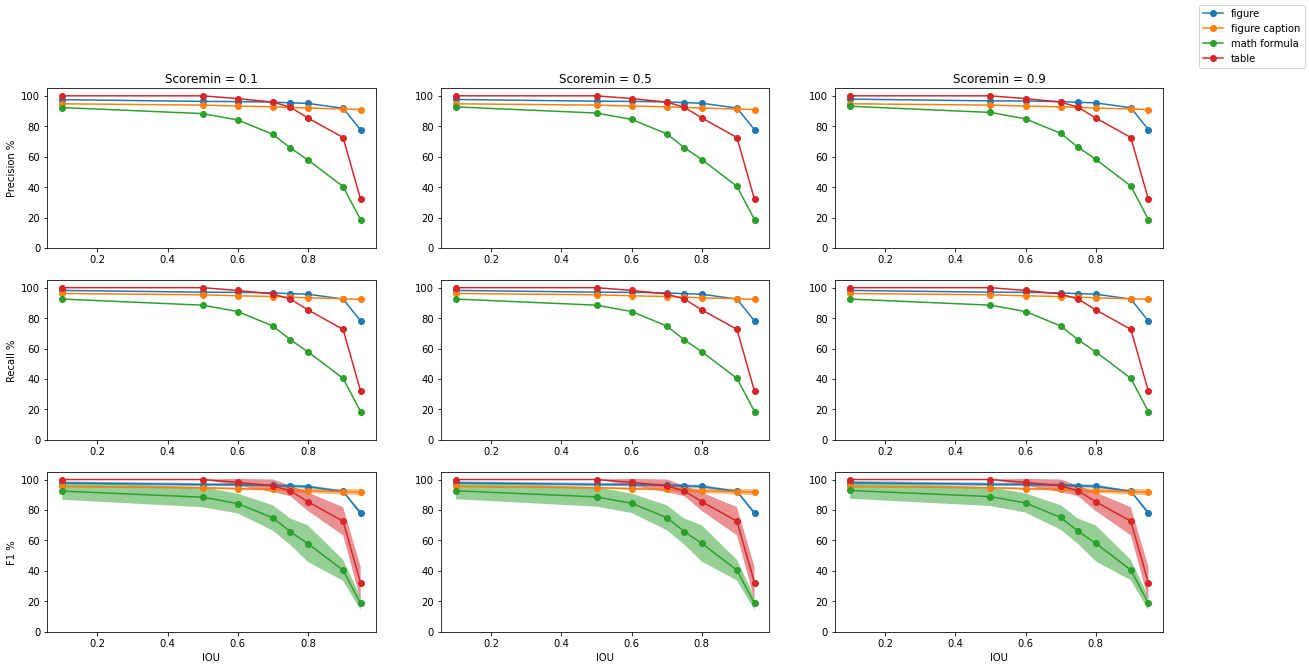

In [10]:
if len(scoreminVec) == 1:
    fig, ax = plt.subplots(3,len(scoreminVec),  figsize=(10,10))
    ax = np.array([ax,ax]).T
else:
    fig, ax = plt.subplots(3,len(scoreminVec),  figsize=(20,10))

ps = []
for i in range(len(scoreminVec)):
    for k in range(len(LABELS)): p1, = ax[0][i].plot(iouminVec,precision[k,i,:],'o-')
    ps.append(p1)
    ax[0][i].set_title('Scoremin = '+str(scoreminVec[i]))
    ax[0][0].set_ylabel('Precision %')
    ax[0][i].set_ylim(0,105)
    
    for k in range(len(LABELS)): ax[1][i].plot(iouminVec,recall[k,i,:], 'o-')
    ax[1][0].set_ylabel('Recall %')
    ax[1][i].set_ylim(0,105)
    
    for k in range(len(LABELS)): 
        ax[2][i].plot(iouminVec,f1[k,i,:], 'o-')
        # include stddev
        ax[2][i].fill_between(iouminVec, f1[k,i,:]-f1_std[k,i,:], f1[k,i,:]+f1_std[k,i,:], alpha=0.5)
    
    ax[2][0].set_ylabel('F1 %')
    ax[2][i].set_ylim(0,105)
        
    ax[-1][i].set_xlabel('IOU')

fig.legend(ps, labels=LABELS)
matplotlib.rcParams.update({'font.size': 12})
plt.show()

Choose a score cut-off.  For the most part, we've found 0.1 to be fine:

In [11]:
scoremin = 0.1

What IOU cut-offs for each label? for reference:

In [12]:
LABELS

['figure', 'figure caption', 'math formula', 'table']

In [13]:
ioumin_per_label = [0.9, 0.95, 0.8, 0.6] # fig, fig+caption, math formula, table

In [14]:
#Shape is: (# labels, #scores, #ious, #CV folds)
TPs, FPs, FNs, totalTrues = calc_base_metrics_allboxes_cv(LABELS,[scoremin],ioumin_per_label,
                                              truebox3,boxes_sq5,labels_sq5, 
                                              scores_sq5,n_folds_cv=n_folds_cv)
totalTrue = totalTrues.sum(axis=1).astype('int') # collapse onto 1 axis
TP = np.diagonal(TPs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU
FP = np.diagonal(FPs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU
FN = np.diagonal(FNs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU

In [15]:
precisions, precision_stds, recalls, \
  recall_stds, f1s, f1_stds = calc_prec_rec_f1_cv(TPs,FPs,FNs,
                                               LABELS,[scoremin],
                                               ioumin_per_label)
precision = np.diagonal(precisions[:,0,:]) 
precision_std = np.diagonal(precision_stds[:,0,:]) 
recall = np.diagonal(recalls[:,0,:]) 
recall_std = np.diagonal(recall_stds[:,0,:]) 
f1 = np.diagonal(f1s[:,0,:]) 
f1_std = np.diagonal(f1_stds[:,0,:]) 

In [16]:
print_metrics_table(totalTrue,TP,FP,FN,
                        precision, precision_std, recall, recall_std,f1,f1_std,
                        LABELS, scoremin, n_folds_cv, ioumin_per_label)

SCORE =  0.1  N_CV =  5
Metric          figure          figure caption  math formula    table          
iou cut         0.9             0.95            0.8             0.6            
# of objs       799             772             205             126            
--------------------------------------------------------------------------------------------
TP              92.5%           92.4%           57.1%           98.4%          
FP              8.3%            9.2%            43.4%           1.6%           
FN              7.5%            7.6%            42.9%           1.6%           
--------------------------------------------------------------------------------------------
Precision       91.8+/-2.1%     91.1+/-1.7%     56.0+/-10.5%    98.8+/-2.5%    
Recall          92.4+/-1.7%     92.4+/-1.9%     56.5+/-10.7%    98.8+/-2.5%    
F1              92.1+/-1.8%     91.7+/-1.7%     56.2+/-10.6%    98.8+/-2.5%    


In [17]:
#Shape is: (# labels, #scores, #ious, #CV folds)
TPs, FPs, FNs, totalTrues = calc_base_metrics_allboxes_cv(LABELS,[scoremin],[0.8,0.8,0.8,0.8],
                                              truebox3,boxes_sq5,labels_sq5, 
                                              scores_sq5,n_folds_cv=n_folds_cv)
totalTrue = totalTrues.sum(axis=1).astype('int') # collapse onto 1 axis
TP = np.diagonal(TPs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU
FP = np.diagonal(FPs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU
FN = np.diagonal(FNs[:,0,:,:].sum(axis=2)) # sum across all CV, then for the right IOU

precisions, precision_stds, recalls, \
  recall_stds, f1s, f1_stds = calc_prec_rec_f1_cv(TPs,FPs,FNs,
                                               LABELS,[scoremin],
                                               [0.8,0.8,0.8,0.8])
precision = np.diagonal(precisions[:,0,:]) 
precision_std = np.diagonal(precision_stds[:,0,:]) 
recall = np.diagonal(recalls[:,0,:]) 
recall_std = np.diagonal(recall_stds[:,0,:]) 
f1 = np.diagonal(f1s[:,0,:]) 
f1_std = np.diagonal(f1_stds[:,0,:]) 

print_metrics_table(totalTrue,TP,FP,FN,
                        precision, precision_std, recall, recall_std,f1,f1_std,
                        LABELS, scoremin, n_folds_cv, [0.8,0.8,0.8,0.8])

SCORE =  0.1  N_CV =  5
Metric          figure          figure caption  math formula    table          
iou cut         0.8             0.8             0.8             0.8            
# of objs       799             772             205             126            
--------------------------------------------------------------------------------------------
TP              95.7%           93.4%           57.1%           85.7%          
FP              5.0%            8.2%            43.4%           14.3%          
FN              4.3%            6.6%            42.9%           14.3%          
--------------------------------------------------------------------------------------------
Precision       95.1+/-1.7%     91.9+/-1.8%     56.3+/-6.9%     85.9+/-4.8%    
Recall          95.8+/-1.0%     93.3+/-1.6%     56.7+/-6.5%     85.9+/-4.8%    
F1              95.4+/-1.3%     92.6+/-1.5%     56.5+/-6.7%     85.9+/-4.8%    


## Vs. Time
Also, let's plot metrics vs. year.

In [18]:
# pick a min score and a min IOU
scoremin = 0.1
ioumin = 0.8

In [19]:
df = get_years_dataframe(imgs_name,scoremin,ioumin,LABELS,
                       truebox3,boxes_sq5,labels_sq5,scores_sq5)

In [20]:
df.head()

,years,total:figure,total:figure caption,total:math formula,total:table,TP:figure,TP:figure caption,TP:math formula,TP:table,FP:figure,FP:figure caption,FP:math formula,FP:table,FN:figure,FN:figure caption,FN:math formula,FN:table
0,1895-01-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1896-01-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1897-01-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1898-01-01,3.0,3.0,3.0,0.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1900-01-01,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
sampleHist = '10Y' # 5 years

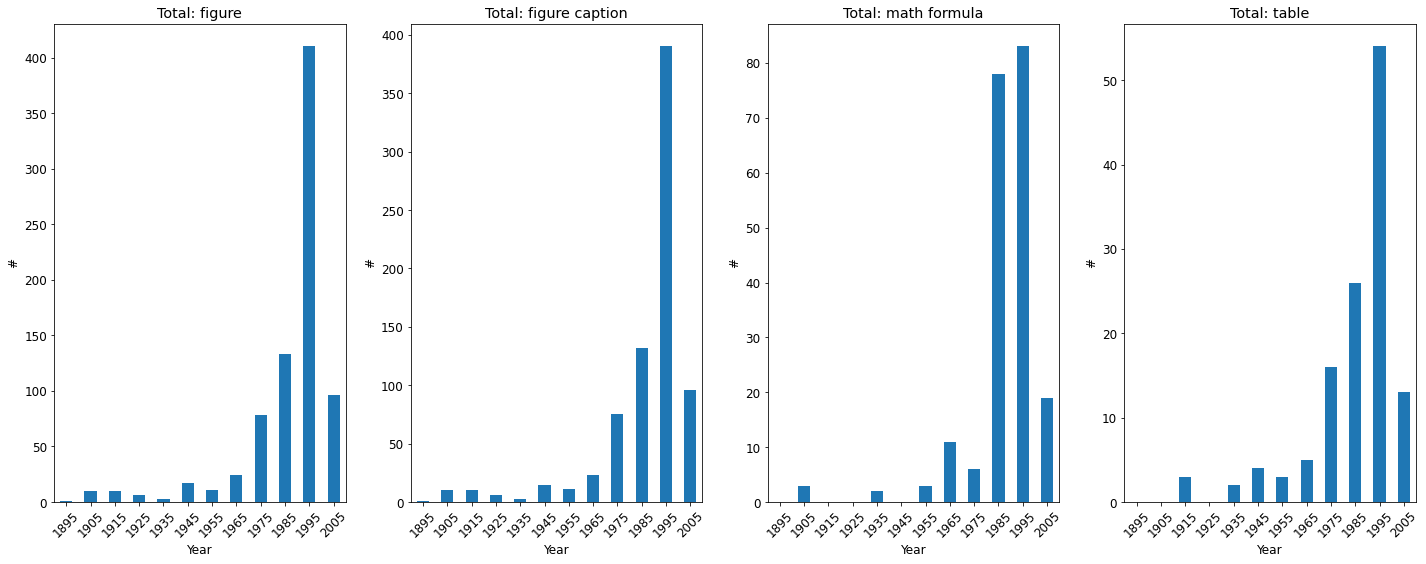

In [22]:
# loop and plot
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))
matplotlib.rcParams.update({'font.size': 12})

for il,l in enumerate(LABELS):
    quant = pd.Series(index=df['years'],data=np.array(df['total:'+l])).resample(sampleHist).sum()
    
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title('Total: ' + l)
    ax[il].set_ylabel('#')
    ax[il].set_xlabel('Year')
#plt.show()

plt.tight_layout()
#plt.savefig(saveFigDir+'yolo_noOCR_articles_per_year.png')

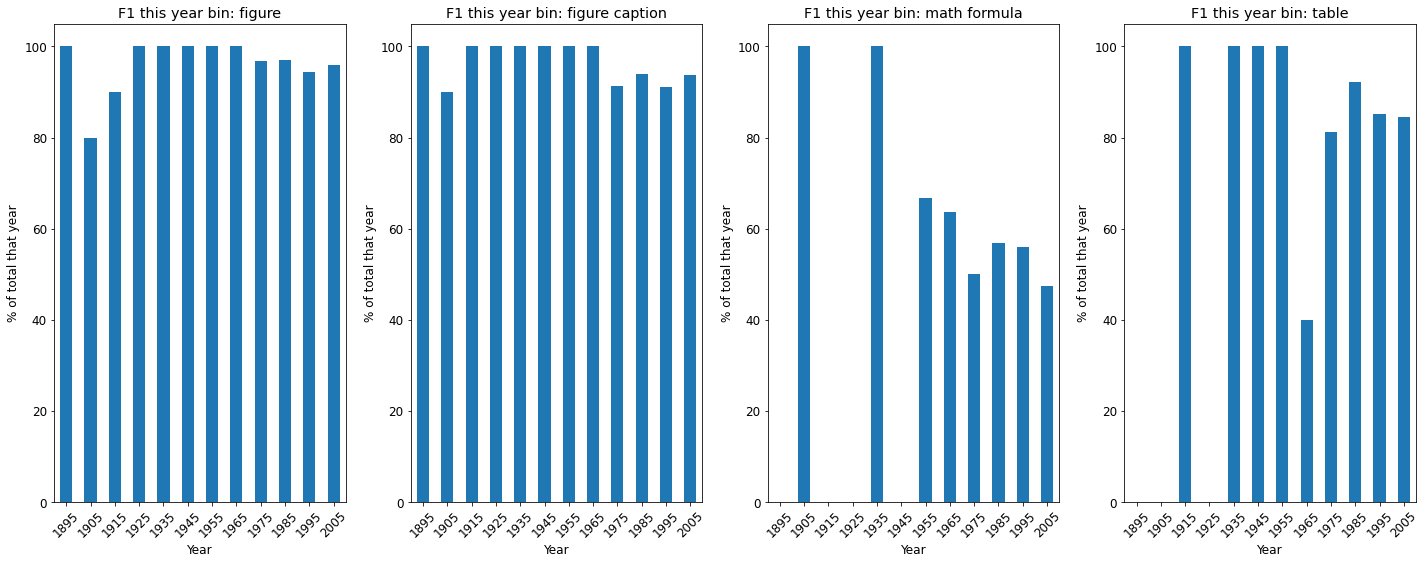

In [23]:
# loop and plot
qname = 'F1:'
bname = 'total:'
qlabel = 'F1'
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))
matplotlib.rcParams.update({'font.size': 12})

for il,l in enumerate(LABELS):
    tp = pd.Series(index=df['years'],data=np.array(df['TP:'+l])).resample(sampleHist).sum()
    fp = pd.Series(index=df['years'],data=np.array(df['FP:'+l])).resample(sampleHist).sum()
    fn = pd.Series(index=df['years'],data=np.array(df['FN:'+l])).resample(sampleHist).sum()
    p = tp/(tp+fp); r = tp/(tp+fn)
    quant = 100*(2.0*r*p)/(r+p)
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title(qlabel+' this year bin: ' + l)
    ax[il].set_ylabel('% of total that year')
    ax[il].set_xlabel('Year')
    
plt.tight_layout()
plt.show()

Some other metrics:

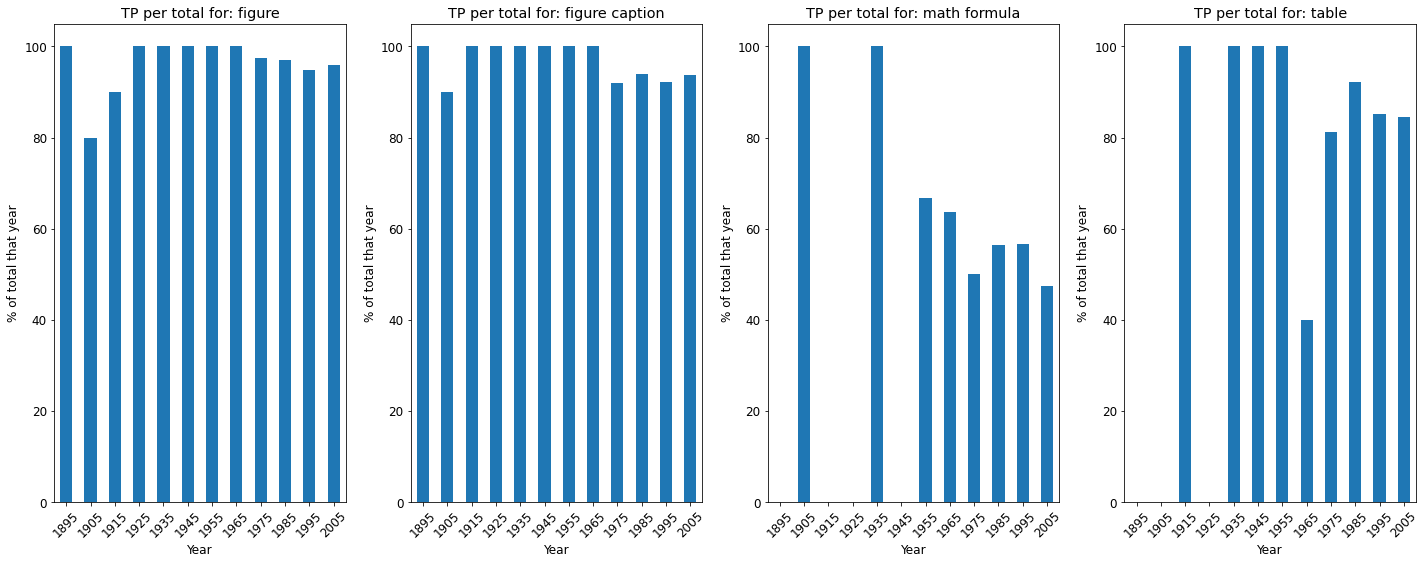

In [24]:
# loop and plot
qname = 'TP:'
bname = 'total:'
qlabel = 'TP'
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))
matplotlib.rcParams.update({'font.size': 12})

for il,l in enumerate(LABELS):
    counts = pd.Series(index=df['years'],data=np.array(df[qname+l])).resample(sampleHist).sum()
    tot = pd.Series(index=df['years'],data=np.array(df[bname+l])).resample(sampleHist).sum()
    with np.errstate(invalid='ignore'): # take care of zeros later
        quant = pd.Series(index=tot.index,data=np.array(100*counts.values/tot.values))
    
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title(qlabel+' per total for: ' + l)
    ax[il].set_ylabel('% of total that year')
    ax[il].set_xlabel('Year')
#plt.show()
plt.tight_layout()
#plt.savefig(saveFigDir+'yolo_noOCR_truePositives_per_year.png')

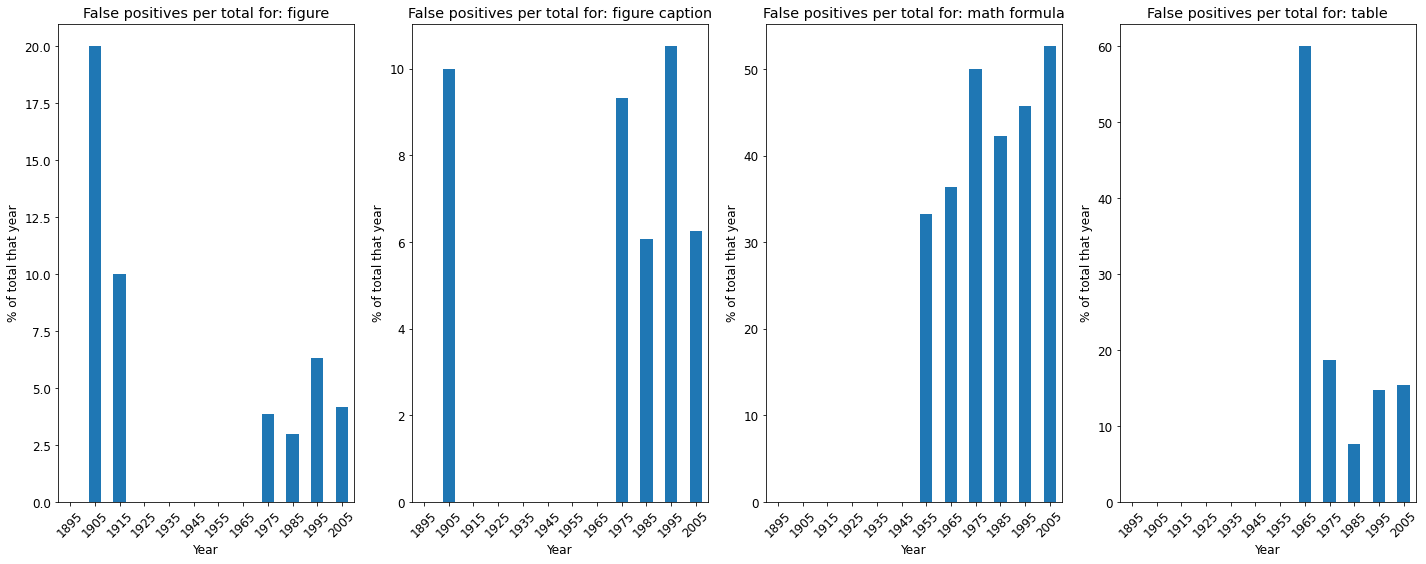

In [25]:
# loop and plot
qname = 'FP:'
bname = 'total:'
qlabel = 'False positives'
#fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))
matplotlib.rcParams.update({'font.size': 12})

for il,l in enumerate(LABELS):
    counts = pd.Series(index=df['years'],data=np.array(df[qname+l])).resample(sampleHist).sum()
    tot = pd.Series(index=df['years'],data=np.array(df[bname+l])).resample(sampleHist).sum()
    with np.errstate(invalid='ignore'): # take care of zeros later
        quant = pd.Series(index=tot.index,data=np.array(100*counts.values/tot.values))
    
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title(qlabel+' per total for: ' + l)
    ax[il].set_ylabel('% of total that year')
    ax[il].set_xlabel('Year')
    
plt.tight_layout()
plt.show()

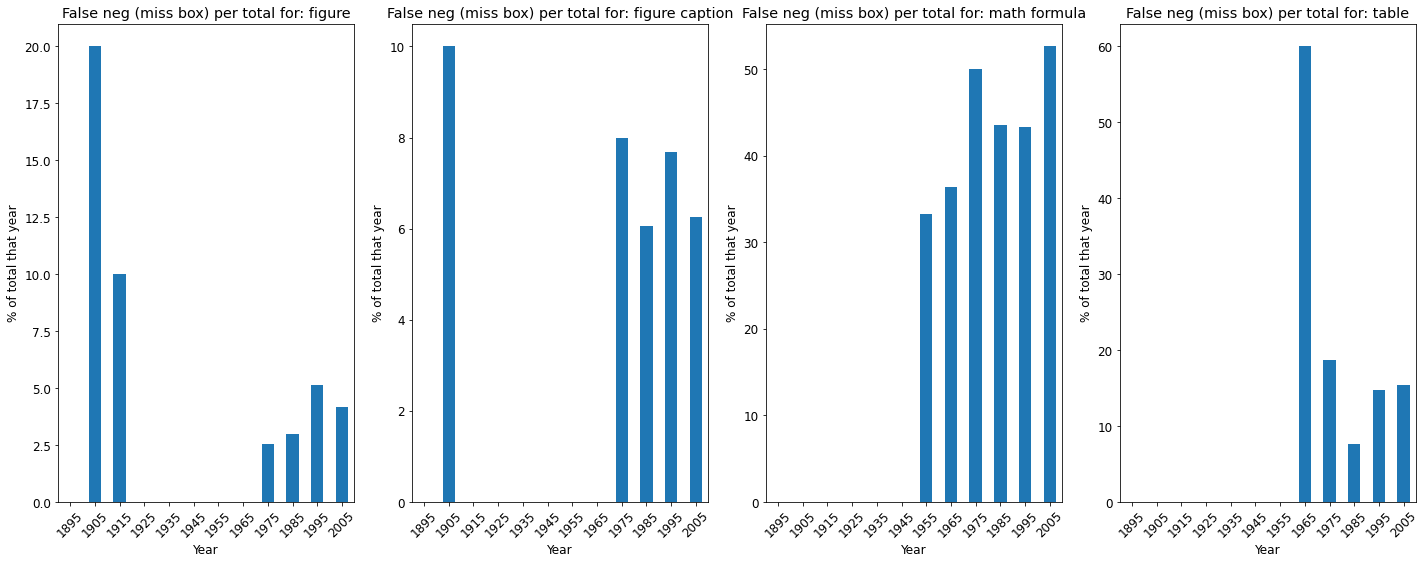

In [26]:
# loop and plot
qname = 'FN:'
bname = 'total:'
qlabel = 'False neg (miss box)'
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))

for il,l in enumerate(LABELS):
    counts = pd.Series(index=df['years'],data=np.array(df[qname+l])).resample(sampleHist).sum()
    tot = pd.Series(index=df['years'],data=np.array(df[bname+l])).resample(sampleHist).sum()
    with np.errstate(invalid='ignore'): # take care of zeros later
        quant = pd.Series(index=tot.index,data=np.array(100*counts.values/tot.values))
    
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title(qlabel+' per total for: ' + l)
    ax[il].set_ylabel('% of total that year')
    ax[il].set_xlabel('Year')
plt.tight_layout()
plt.show()

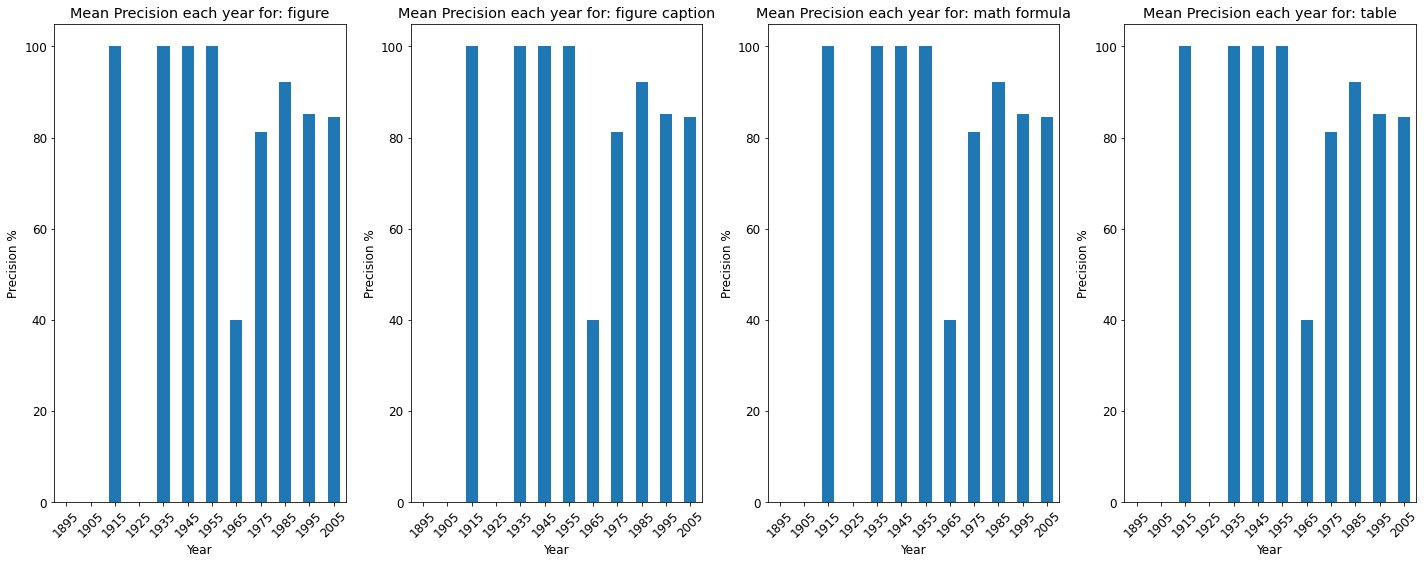

In [27]:
# loop and plot
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))

for il,l in enumerate(LABELS):
    p = tp/(tp+fp); 
    quant = 100*p
    
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title('Mean Precision each year for: ' + l)
    ax[il].set_ylabel('Precision %')
    ax[il].set_xlabel('Year')
plt.tight_layout()
plt.show()

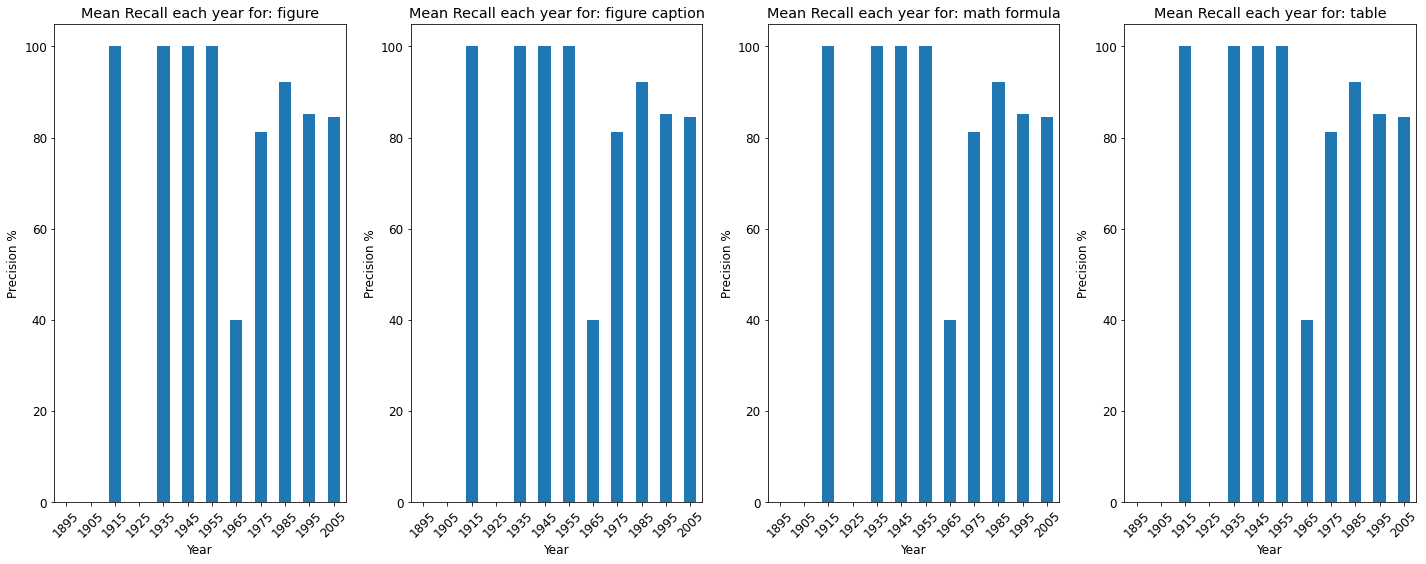

In [28]:
# loop and plot
fig, ax = plt.subplots(1,len(LABELS), figsize=(20,8))

for il,l in enumerate(LABELS):
    r = tp/(tp+fn)
    quant = 100*r
    
    quant.plot(kind='bar',ax=ax[il])
    ax[il].set_xticklabels([x.strftime("%Y") for x in quant.index], rotation=45)
    ax[il].set_title('Mean Recall each year for: ' + l)
    ax[il].set_ylabel('Precision %')
    ax[il].set_xlabel('Year')
plt.tight_layout()
plt.show()

## Save to .dat files if requested

In [37]:
import os

In [16]:
# if save_dats:
#     # save too
#     out_num_name = binary_dirs.split('/')[0]+adder_dats
#     num_out_file = config.save_table_dats_dir + out_num_name
#     #ioumin_per_labels = [0.1, 0.6, 0.8, 0.9, 0.95]
#     #if out_num_name != 'main':
#     if not os.path.exists(num_out_file+'/'):
#         os.makedirs(num_out_file+'/')
#     ioumin_per_labels = ioustar # just the one for our decisions
#     num_out_file += '/' + out_num_name
#     # how many labels to save up to?
#     lend = 2

#     # save to file
#     with open(num_out_file + '_score.dat','w') as fnum:
#         print(scorestar, file=fnum, end='')
#     with open(num_out_file + '_ncv.dat','w') as fnum:
#         print(n_folds_cv, file=fnum, end='')


#     TPv, FPv, FNv, totalTruev = calc_base_metrics_allboxes_cv(LABELS,[scorestar],ioustar,
#                                                   truebox3,boxes_sq5,labels_sq5, 
#                                                   scores_sq5,n_folds_cv=n_folds_cv)

#     precision, precision_std, recall, \
#       recall_std, f1, f1_std = calc_prec_rec_f1_cv(TPv,FPv,FNv,
#                                                    LABELS,[scorestar],
#                                                    ioustar)


#     # print out total true
#     for il,m in enumerate(totalTruev[:lend].sum(axis=-1)):
#         with open(num_out_file + '_totTrue_'+LABELS[il].replace(' ','_')+'.dat','w') as fnum:
#             print(int(m), file=fnum, end='')

#     # print out TP
#     for ii,iou in enumerate(ioustar):
#         iouhere = str(iou).replace('.','p')

#         TP = TPv[:,0,ii,:].sum(axis=-1)
#         FP = FPv[:,0,ii,:].sum(axis=-1)
#         FN = FNv[:,0,ii,:].sum(axis=-1)

#         for il,m in enumerate(TP[:lend]):
#             dat = str(round(m/totalTrue[il]*100,1))
#             with open(num_out_file + '_TP_'+LABELS[il].replace(' ','_')+'_iou'+iouhere+'.dat','w') as fnum:
#                 print(dat, file=fnum, end='')

#         for il,m in enumerate(FP[:lend]):
#             dat = str(round(m/totalTrue[il]*100,1))
#             with open(num_out_file + '_FP_'+LABELS[il].replace(' ','_')+'_iou'+iouhere+'.dat','w') as fnum:
#                 print(dat, file=fnum, end='')

#         for il,m in enumerate(FN[:lend]):
#             dat = str(round(m/totalTrue[il]*100,1))
#             with open(num_out_file + '_FN_'+LABELS[il].replace(' ','_')+'_iou'+iouhere+'.dat','w') as fnum:
#                 print(dat, file=fnum, end='')

#         for il,m in enumerate(LABELS[:lend]):
#             dat = str(np.round(precision[il,0,ii],1))+'$\pm$' +str(np.round(precision_std[il,0,ii],1))
#             with open(num_out_file + '_prec_'+LABELS[il].replace(' ','_')+'_iou'+iouhere+'.dat','w') as fnum:
#                 print(dat, file=fnum, end='')

#         for il,m in enumerate(LABELS[:lend]):
#             dat = str(np.round(recall[il,0,ii],1))+'$\pm$' +str(np.round(recall_std[il,0,ii],1))
#             with open(num_out_file + '_rec_'+LABELS[il].replace(' ','_')+'_iou'+iouhere+'.dat','w') as fnum:
#                 print(dat, file=fnum, end='')

#         for il,m in enumerate(LABELS[:lend]):
#             dat = str(np.round(f1[il,0,ii],1))+'$\pm$' +str(np.round(f1_std[il,0,ii],1))
#             with open(num_out_file + '_f1_'+LABELS[il].replace(' ','_')+'_iou'+iouhere+'.dat','w') as fnum:
#                 print(dat, file=fnum, end='')


In [39]:
binary_dirs

'binaries_model6_tfrecordz/'